In [1]:
import scipy.io
import pandas as pd
import numpy as np

In [2]:
# load data
data = scipy.io.loadmat('game_data.mat')
x = np.concatenate((data['a'],data['b']),axis=1)

In [3]:
data = pd.DataFrame(x,columns=['buy','sell'])
data.head()

,buy,sell
0,34.2,16.0
1,34.2,16.0
2,2.0,-2.8
3,4.6,2.6
4,0.6,-8.0


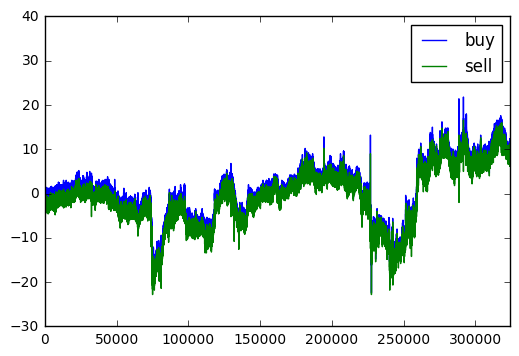

In [4]:
%matplotlib inline
data.plot()

In [5]:
data_length = len(data)
print 'data has %d timestamps'%data_length

data has 324030 timestamps


In [6]:
train_data = data[0:data_length/2]
print 'train_data has %d timestamps'%len(train_data)

train_data has 162015 timestamps


In [7]:
test_data = data[data_length/2:]
print 'train_data has %d timestamps'%len(test_data)

train_data has 162015 timestamps


In [8]:
train_data['spread'] = train_data['sell']-train_data['buy']
train_data['cost'] = train_data['spread'] - 0.2
train_data['real_sell'] = train_data['sell'] - 0.2
train_data.head()

/Users/liuyuguangyuguang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/liuyuguangyuguang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/liuyuguangyuguang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,buy,sell,spread,cost,real_sell
0,34.2,16.0,-18.2,-18.4,15.8
1,34.2,16.0,-18.2,-18.4,15.8
2,2.0,-2.8,-4.8,-5.0,-3.0
3,4.6,2.6,-2.0,-2.2,2.4
4,0.6,-8.0,-8.6,-8.8,-8.2


In [9]:
print np.mean(train_data['buy']), np.mean(train_data['real_sell'])
print np.std(train_data['buy']), np.std(train_data['real_sell'])

-2.13917353331 -3.92204178625
4.17065330177 4.16629203259


In [10]:
for i in range(0,5):
    rand_num = np.random.randint(0,len(train_data)-1,size=1000)
    sample_mean = np.mean(train_data.ix[rand_num])
    sample_std = np.std(train_data.ix[rand_num])
    print sample_mean['buy'],sample_std['buy']
    print sample_mean['real_sell'],sample_std['real_sell']

-2.0096 4.33095691967
-3.8064 4.23282872793
-2.0806 4.10045163854
-3.8712 4.12055949599
-1.9912 4.03794038589
-3.7612 4.02834141552
-1.9948 4.07610266799
-3.7592 4.07999207842
-1.8994 3.90441796431
-3.7046 3.90853154522


In [11]:
one_std = train_data.buy[(train_data.buy>np.mean(train_data.buy)+np.std(train_data.buy))|
              (train_data.buy<np.mean(train_data.buy)-np.std(train_data.buy))]
print one_std.count(),float(one_std.count())/len(train_data)

38198 0.235768293059


In [ ]:
train_data.cost_mean = train_data.cost - np.mean(train_data.cost)
train_data.index = pd.to_datetime(train_data.index,unit='s')
result3 = acf(train_data.cost_mean)
result4 = pacf(train_data.cost_mean)
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
ax1.bar(range(0,41),result1)
ax2.bar(range(0,41),result2)

In [ ]:
model2 = ARIMA(train_data.cost_mean,(0,0,1))
pred2 = model2.fit()
pred_data2 = pred.predict(1,1000)
train_data.cost_mean.plot()
pred_data2.plot()
plt.gcf().autofmt_xdate()
plt.show()

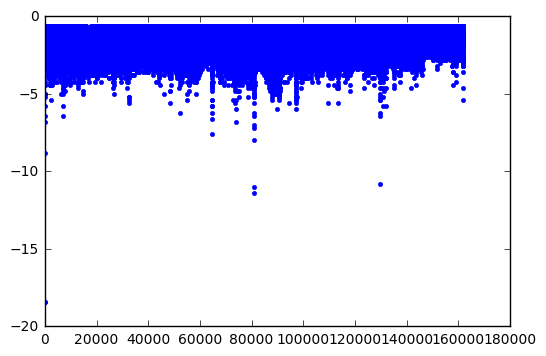

In [18]:
import matplotlib.pylab as plt
plt.plot(train_data.cost,'.')

             buy  sell  spread  cost  real_sell
1970-01-01  34.2  16.0   -18.2 -18.4       15.8
1970-01-02  34.2  16.0   -18.2 -18.4       15.8
1970-01-03   2.0  -2.8    -4.8  -5.0       -3.0
1970-01-04   4.6   2.6    -2.0  -2.2        2.4
1970-01-05   0.6  -8.0    -8.6  -8.8       -8.2


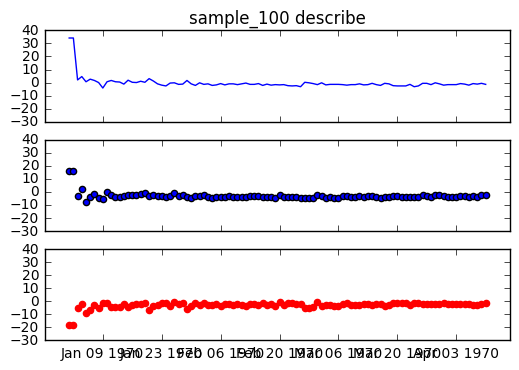

In [60]:
sample_100 = train_data[0:100]
sample_100.index = pd.to_datetime(sample_100.index,unit='s')
print sample_100.head()
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(sample_100.buy)
ax1.set_title('sample_100 describe')
ax2.scatter(sample_100.index,sample_100.sell)
ax3.scatter(sample_100.index,sample_100.cost, color='r')

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
# f.subplots_adjust(hspace=0)
# plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [61]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

-2.928


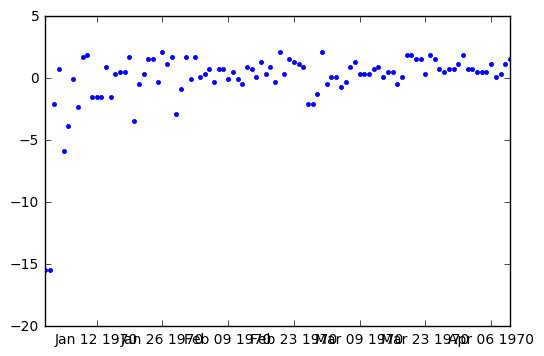

In [62]:
sample_100.cost_mean = sample_100.cost - np.mean(sample_100.cost)
print np.mean(sample_100.cost)
plt.plot(sample_100.cost_mean,'.')

<Container object of 41 artists>

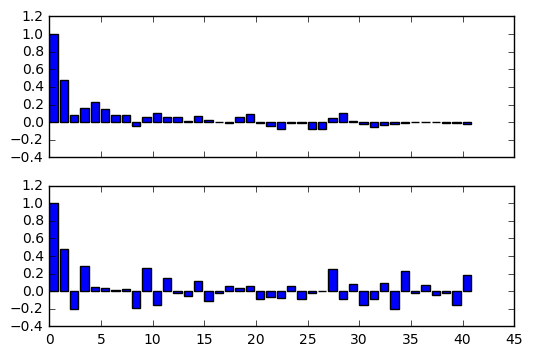

In [63]:
result1 = acf(sample_100.cost_mean)
result2 = pacf(sample_100.cost_mean)
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
ax1.bar(range(0,41),result1)
ax2.bar(range(0,41),result2)


In [64]:
? pd.to_datetime

In [65]:
model = ARIMA(sample_100.cost_mean,(1,0,1))

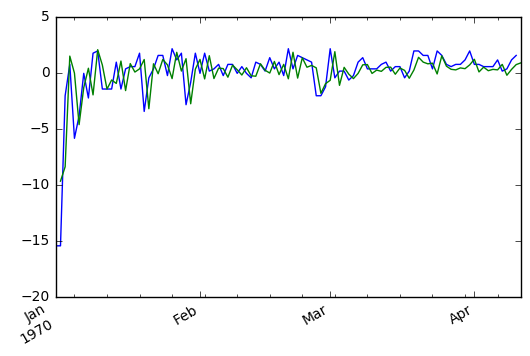

In [83]:
pred = model.fit()
pred_data= pred.predict(1, 100)
sample_100.cost_mean.plot()
pred_data.plot()
plt.gcf().autofmt_xdate()
plt.show()